# Линейный график (line plot)

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

За построение линейного графика в библиотеке seaborn отвечает функция `sns.lineplot()`.

Разбирать работу этой функции будем на примере встроенного в *seaborn* датасета, который называется `'exercise'`. Посмотрим на этот датасет:

In [3]:
exercise = sns.load_dataset('exercise')
exercise = exercise.drop('Unnamed: 0', axis=1)

exercise.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [4]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     category
 4   kind    90 non-null     category
dtypes: category(3), int64(2)
memory usage: 2.2 KB


Датасет `exercise` в библиотеке *seaborn* содержит данные о результатах тестирования, полученных от группы людей, которые выполняли различные физические упражнения. Этот набор данных включает в себя информацию о четырех различных упражнениях (по два из каждой категории: аэробные и анаэробные) и их воздействии на сердечный ритм и потерю веса.

Вот краткое описание переменных в этом датасете:
- `id` - уникальный идентификатор участника тестирования;
- `diet` - диета, которую придерживался участник (no fat - полное исключение жиров, low fat - низкожировая диета);
- `pulse` - средний пульс участника после выполнения упражнения;
- `time` - время, проведенное на упражнениях (в минутах);
- `kind` - тип упражнения (running (бег), walking (ходьба), rest (отдых)).

Создадим линейный график, где по оси абсцисс отложим значения времени, а по оси ординат - частоту сердечных сокращений:

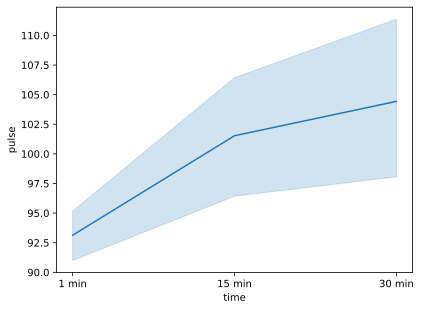

In [5]:
sns.lineplot(data=exercise, x='time', y='pulse');

И сразу добавим ненавязчивую сетку с использованием функции `plt.grid()`:

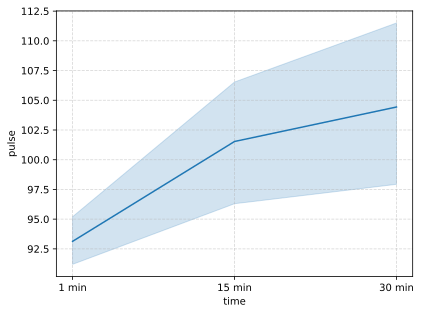

In [6]:
sns.lineplot(x='time', y='pulse', data=exercise)

plt.grid(linestyle='--', alpha=0.5);

В итоге получили линейный график с некоторой областью, выделенной голубым цветом. Эта область называется доверительным интервалом. Сейчас отключим эту опцию, передав функции `sns.lineplot` параметр `ci` (или `errorbar`) со значением `None` (`ci=None`):

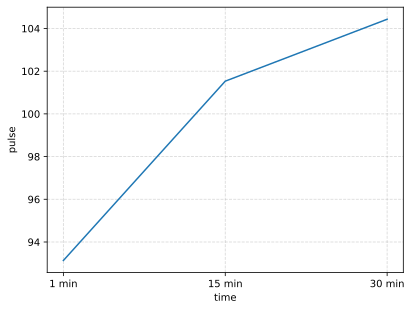

In [8]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None)

plt.grid(linestyle='--', alpha=0.5);

На выходе получаем линейный график, который описывает вполне логичную закономерность - при увеличении времени занятия упражнениями возрастает и частота сердечных сокращений.

Теперь рассмотрим, какие возможности даёт нам библиотека *seaborn* для изменения внешнего вида этого графика. 

Сначала добавим маркеры на линию графика, используя параметр `marker`:

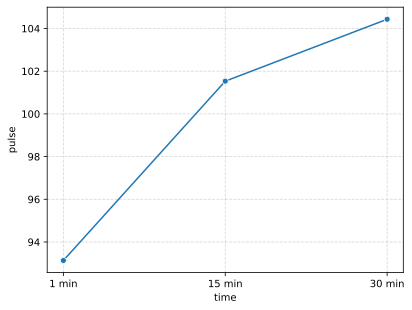

In [10]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             marker='o')

plt.grid(linestyle='--', alpha=0.5);

Размер точек на графике регулируется параметром `markersize`. Можно также использовать сокращённое название этого параметра - `'ms'`. Для примера увеличим размер точек на нашем графике:

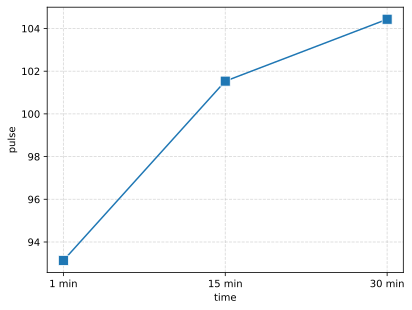

In [12]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             marker='s',
             markersize=10)

plt.grid(linestyle='--', alpha=0.5);

Можем менять цвет маркеров. За эту опцию отвечает параметр `markerfacecolor`, которому передаётся строка, содержащая нужный цвет. Для примера сделаем цвет точек на нашем графике красным:

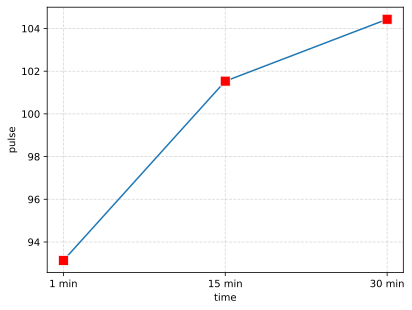

In [13]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             marker='s',
             ms=10,
             markerfacecolor='red')

plt.grid(linestyle='--', alpha=0.5);

Перейдём к манипуляциям с линией графика и поменяем её толщину и цвет. За изменение толщины линии графика отвечает параметр `linewidth` или его сокращенная версия - `lw`. 

Сделаем линию графика немного пошире:

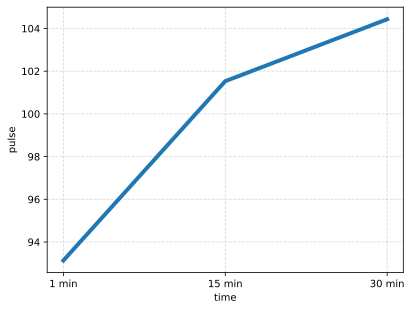

In [15]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             linewidth=4)

plt.grid(linestyle='--', alpha=0.5);

А чтобы поменять цвет линии графика, надо параметру `color` передать строку с наименованием цвета. Перекрасим наш график в зелёный цвет:

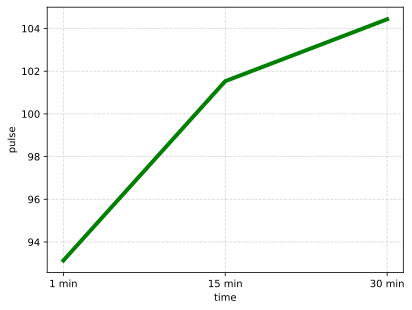

In [17]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             lw=4,
             color='green')

plt.grid(linestyle='--', alpha=0.5);

Также функция `sns.lineplot()` содержит в своём арсенале параметр `alpha`, позволяющим управлять прозрачностью линий графика. 

Пример:

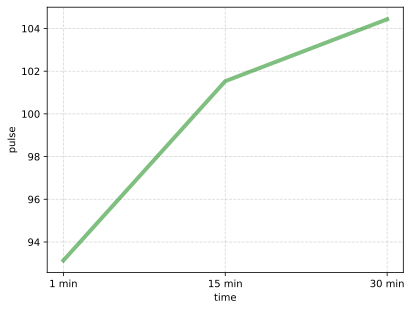

In [19]:
sns.lineplot(x='time', y='pulse', data=exercise,
             errorbar=None,
             lw=4,
             color='green',
             alpha=0.5)

plt.grid(linestyle='--', alpha=0.5);

**Параметры hue, hue_order**

Параметр `hue` в функции `sns.lineplot()` библиотеки *seaborn* позволяет разделить данные на группы по заданной переменной и представить каждую группу в виде отдельной линии на графике, используя различные цвета или стили.

Когда указываем переменную в параметре `hue`, *seaborn* автоматически обнаруживает уникальные значения этой переменной и создает отдельную линию для каждого уникального значения, используя соответствующий цвет или стиль.

Создадим линейные графики для каждого типа нагрузки:

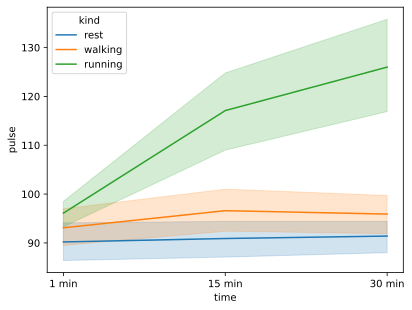

In [20]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind');

Параметр `hue_order` в функции `sns.lineplot()` библиотеки *seaborn* позволяет задать определенный порядок для категорий переменной, которая используется в параметре hue. По умолчанию *seaborn* автоматически определяет порядок категорий на основе их появления в данных. Однако с помощью `hue_order` сможем указать конкретный порядок категорий, который будет использоваться для построения графика.

Это особенно полезно, когдс есть определенный логический или предпочтительный порядок для категорий, которыхотимте отразить на графике.

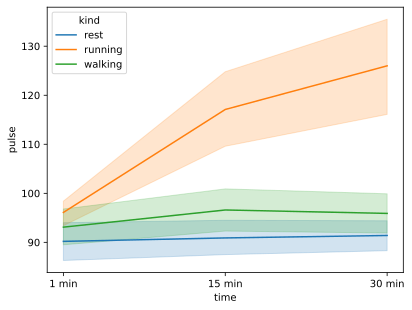

In [21]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             hue_order=['rest', 'running', 'walking']);

Изменился порядок отображения видов нагрузки в легенде и цветовая гамма распределилась иначе.

**Параметры size, size_order и sizes**

Параметр `size` позволяет указать переменную, значения которой будут определять толщину линий на графике. Это может оказаться востребованным, когда хотим визуально выделить определенные группы данных, делая их линии толще или тоньше в зависимости от значения этой переменной.

Например:

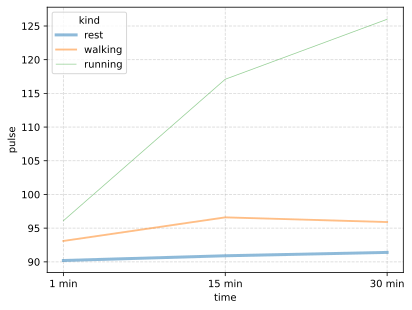

In [22]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             errorbar=None,
             alpha=0.5,
             size='kind')

plt.grid(linestyle='--', alpha=0.5);

Теперь графики, отвечающие за разные виды физической нагрузки, имеют различную толщину.

Параметр `size_order` позволяет задать конкретный порядок для значений переменной, указанной в `size`. Это может быть полезным, когда хотим контролировать, какие размеры будут назначены различным значениям переменной. Значения переменной будут упорядочены в соответствии с порядком, указанным в `size_order`.

Изменим порядок увеличения толщины линий на противоположный:

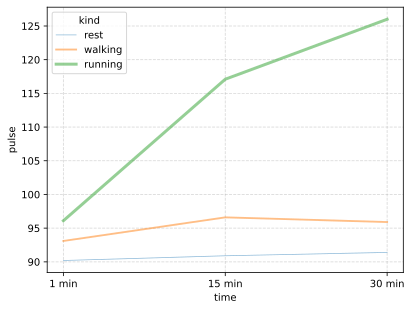

In [23]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             errorbar=None,
             alpha=0.5,
             size='kind',
             size_order=['running', 'walking', 'rest'])

plt.grid(linestyle='--', alpha=0.5);

Параметром `sizes` можно задавать диапазон возможных размеров линий. Для примера сделаем диапазон толщины линий от 2 до 4: 

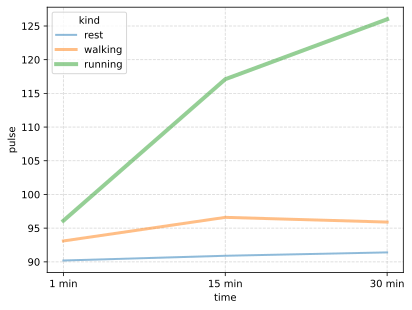

In [25]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             errorbar=None,
             alpha=0.5,
             size='kind',
             size_order=['running', 'walking', 'rest'],
             sizes=(2, 4))

plt.grid(linestyle='--', alpha=0.5);

**Параметр estimator**
Ннарисуем график, сгруппированный по виду нагрузки:

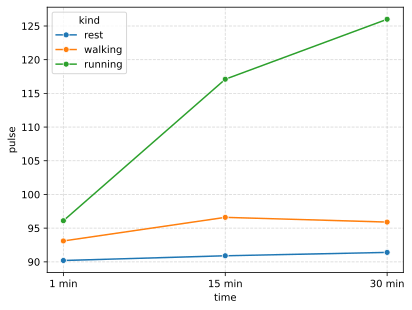

In [26]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='kind',
             errorbar=None,
             marker='o')

plt.grid(linestyle='--', alpha=0.5);

Рассмотрим точку, которая  соответствует 15-ти минутной пробежке (линия зелёного цвета). Значение находится примерно на отсечке 117 ударов в минуту. 

Теперь сделаем выборку из нашего датафрейма, которая бы соответствовала типу нагрузки - `'running'` и времени - `'15 min'`: 

In [27]:
exercise[(exercise['kind'] == 'running') & 
         (exercise['time'] == '15 min')]

,id,diet,pulse,time,kind
61,21,low fat,98,15 min,running
64,22,low fat,104,15 min,running
67,23,low fat,105,15 min,running
70,24,low fat,132,15 min,running
73,25,low fat,110,15 min,running
76,26,no fat,126,15 min,running
79,27,no fat,126,15 min,running
82,28,no fat,124,15 min,running
85,29,no fat,135,15 min,running
88,30,no fat,111,15 min,running


Видим, что датафрейм содержит несколько значений с такими параметрами. Так вот, по умолчанию функция `sns.lineplot()` использует среднее значение `('mean')`. 

In [28]:
exercise[(exercise['kind'] == 'running') & 
         (exercise['time'] == '15 min')]['pulse'].mean()

117.1

То есть, когда мы вводим на исполнение код:

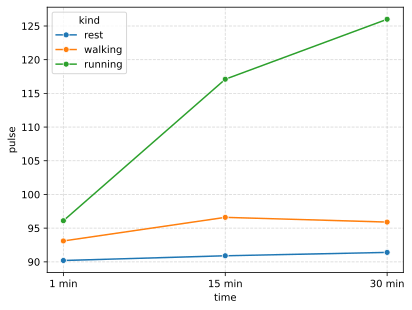

In [29]:
sns.lineplot(x="time", y="pulse", data=exercise,
             hue='kind',
             errorbar=None,
             marker='o')

plt.grid(linestyle='--', alpha=0.5);

*seaborn* производит подобную группировку:

In [30]:
exercise[['kind', 'time', 'pulse']].groupby(by=['kind', 'time']).mean()

C:\Users\ardat\AppData\Local\Temp\ipykernel_36340\2857831735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exercise[['kind', 'time', 'pulse']].groupby(by=['kind', 'time']).mean()


pulse
kind    time         
rest    1 min    90.2
        15 min   90.9
        30 min   91.4
walking 1 min    93.1
        15 min   96.6
        30 min   95.9
running 1 min    96.1
        15 min  117.1
        30 min  126.0

И выводит на экран график, который представлен выше.

То есть библиотека *seaborn* разгружает нас в том плане, что нам не нужно предварительно производить группировку данных - функция `sns.lineplot()` сделает это за нас. Удобно!

За выбор метода агрегации данных в функции `sns.lineplot()` отвечает параметр `estimator`, который по умолчанию использует среднее значение `('mean')`, как отмечалось ранее. Но пользователь имеет возможность задать и другой метод агрегации, например, медиану, сумму или пользовательскую функцию.

Для примера построим график с медианным значением:

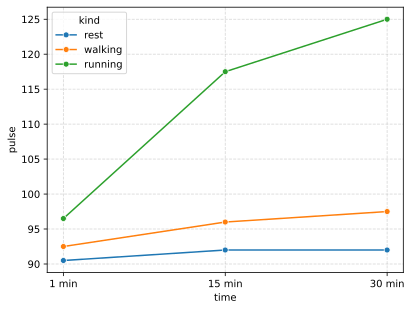

In [32]:
sns.lineplot(x="time", y="pulse", data=exercise,
             hue='kind',
             errorbar=None,
             marker='o',
             estimator='median')

plt.grid(linestyle='--', alpha=0.5);

В данном случае, параметру `estimator` передали значение `'median'`.
Также параметру `estimator` можно передавать функции библиотеки *NumPy*.

Например, построим график, используя суммирование значений:

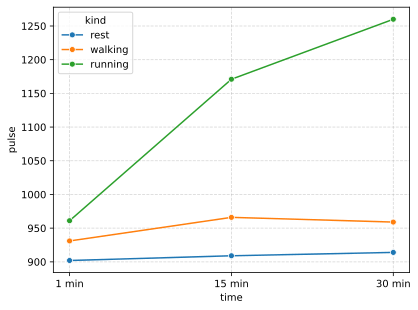

In [34]:
sns.lineplot(x="time", y="pulse", data=exercise,
             hue='kind',
             errorbar=None,
             marker='o',
             estimator=np.sum)

plt.grid(linestyle='--', alpha=0.5);

**Параметр ci**

Параметр `ci` в функции `sns.lineplot()` используется для отображения доверительных интервалов вокруг линии графика.

Доверительный интервал (Confidence Interval, CI) - это диапазон значений, который, как предполагается, содержит истинное значение параметра с определённым уровнем достоверности. Например, 95%-й доверительный интервал означает, что если бы мы многократно повторяли эксперименты и строили доверительные интервалы, то в 95% случаев этот интервал содержал бы истинное значение параметра.

По умолчанию `ci=95`, что означает построение 95%-го доверительного интервала вокруг средней линии.

Или необходимо писать `errorbar=('ci', 95)`.

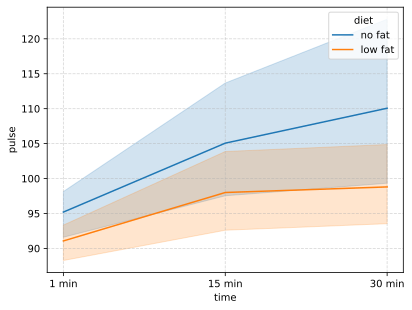

In [35]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='diet')

plt.grid(linestyle='--', alpha=0.5);

Если значение параметра `errorbar` уменьшить, то и доверительный интервал станет менее широким, например:

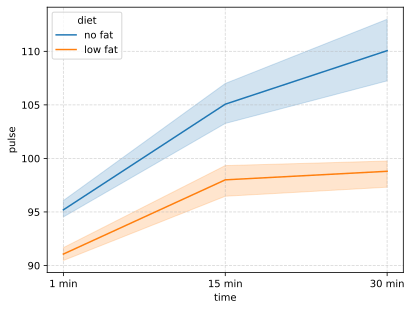

In [39]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='diet',
             errorbar=('ci', 35))

plt.grid(linestyle='--', alpha=0.5);

**Параметры n_boot и seed**

В функции `sns.lineplot()` для оценки доверительных интервалов используется метод бутстрап. Бутстрап (Bootstrap) - это статистический метод, используемый для оценки свойств распределения данных (например, среднего, дисперсии, доверительных интервалов) с помощью многократного повторного взятия выборок из исходных данных с возвращением.

Для рассмотрения примера бутстрапа выберем точку, которая соответствует 15-ти минутной нагрузке для людей на низкожировой диете (точка, находящаяся посередине на графике оранжевого цвета на предыдущем рисунке).

Посмотрим, на каких значениях были рассчитаны средняя и доверительный интервал для этой точки:

In [40]:
exercise[(exercise['diet'] == 'low fat') & 
         (exercise['time'] == '15 min')]

,id,diet,pulse,time,kind
1,1,low fat,85,15 min,rest
4,2,low fat,92,15 min,rest
7,3,low fat,97,15 min,rest
10,4,low fat,82,15 min,rest
13,5,low fat,92,15 min,rest
31,11,low fat,86,15 min,walking
34,12,low fat,103,15 min,walking
37,13,low fat,92,15 min,walking
40,14,low fat,96,15 min,walking
43,15,low fat,96,15 min,walking


Выделим отдельно столбец `'pulse'`:

In [41]:
smpl = exercise[(exercise['diet'] == 'low fat') & 
                (exercise['time'] == '15 min')]['pulse']

print(smpl, smpl.size, sep='\n\n')

1      85
4      92
7      97
10     82
13     92
31     86
34    103
37     92
40     96
43     96
61     98
64    104
67    105
70    132
73    110
Name: pulse, dtype: int64

15


Наша серия с параметрами сердечного пульса содержит 15 значений. Это будут наши входящие данные для бутстрапа.

А теперы начинаем создавать новые подвыборки, которые будут содержать тоже по 15 значений, случайным образом выбранных из нашей входящей серии. Причём формироваться новые подвыборки будут с возвращением, т.е. одно и то же значение из входящей серии может попасть в новую подвыборку несколько раз, а какого-то значения из входящей серии может вообще не встретиться в новой подвыборке.

Сформируем первую подвыборку и посмотрим на ее среднее значение:

In [42]:
smpl1 = smpl.sample(n=15, replace=True, random_state=12345)

print(smpl1, smpl.size, f'Среднее = {smpl1.mean()}', sep='\n\n')

7      97
31     86
70    132
4      92
13     92
43     96
73    110
73    110
31     86
7      97
70    132
4      92
34    103
4      92
64    104
Name: pulse, dtype: int64

15

Среднее = 101.4


Видим, что значение 73  выпало два раза

Сформируем вторую случайную подвыборку:

In [43]:
smpl2 = smpl.sample(n=15, replace=True, random_state=42)

print(smpl2, smpl.size, f'Среднее = {smpl2.mean()}', sep='\n\n')

34    103
10     82
67    105
73    110
61     98
37     92
67    105
13     92
34    103
43     96
7      97
34    103
61     98
61     98
37     92
Name: pulse, dtype: int64

15

Среднее = 98.26666666666667


Среднее значение первой подвыборки получилось равным 101.4, а второй = 98.27. Теперь, если мы создадим тысячу таких подвыборок и расположим получившиеся средние значения по возрастанию, то мы получим 100%-й доверительный интервал. Если нам нужем 95%-й доверительный интервал, то мы исключим 2,5% самых меньших и 2,5% самых больших полученных средних значений.

В функции `sns.lineplot()` за количество создаваемых бутстрап-выборок отвечает параметр `n_boot`, который по умолчанию принимает значение = `1000`.

А для обеспечения воспроизводимости результатов при выполнении бутстрап-выборок используется параметр `seed`. Воспроизводимость означает, что мы получим те же самые результаты при каждом запуске кода, если используем одно и то же начальное значение для генератора случайных чисел.

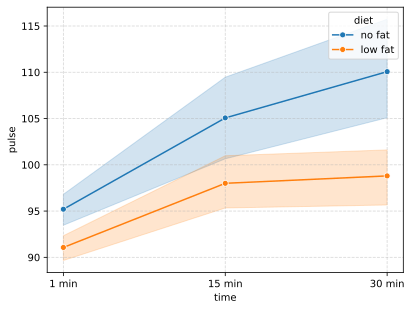

In [44]:
sns.lineplot(x='time', y='pulse', data=exercise,
             hue='diet',
             marker='o',
             errorbar=('ci',72),
             n_boot=100,
             seed=42)

plt.grid(linestyle='--', alpha=0.5);

Параметр `errorbar` - позволяет отображать на графике не только доверительный интервал, но и другие статистически полезные данные, такие как различные персентили, стандартную ошибку и кастомные функции (min, max).